In [2]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import numpy as np

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 16}

SAVEFIG = True
directory = "./figures/"
def _savefig(fig, name):
    import os
    fig.savefig(
        os.path.join(directory, '{}.pdf'.format(name)),
        bbox_inches='tight'
    )
    
savefig = _savefig if SAVEFIG else lambda x, y: None

In [11]:
df = pd.read_csv('./sankey_data_final_1_decision.csv', sep=';')
df['original_developers'] = (df['original_developers']
                                   .replace({'cannot remember':'unknown'})
                                  )
df.groupby('motivation_detail').count().sort_values('decision').motivation.sum()


145

In [18]:
df = pd.read_csv('./sankey_data_final_1_decision.csv', sep=';')
df.groupby(['motivation','motivation_detail']).count()

variant_status  original_developers  \
motivation motivation_detail                                                   
governance differences                                1                    1   
           feature acceptance                        15                   15   
           responsiveness                            18                   18   
legal      closed source                              1                    1   
           commercial variant                         1                    1   
           privacy                                    1                    1   
others     code quality                               3                    3   
           community related                          3                    3   
           localization                               3                    3   
           supporting personal projects               7                    7   
           supporting upstream                        7                    7   
           upstream lacks the resources               1                    1   
technical  customization                              8                    8   
           different goals                           17                   17   
           enhancement                                4                    4   
           feature frozen                             7                    7   
           maintenance                               19                   19   
           new features                              17                   17   
           new release                                2                    2   
           stripped version                           2                    2   
           technology                                 8                    8   

                                         common_active_maintainers  decision  
motivation motivation_detail                                                  
governance differences                                           1         1  
           feature acceptance                                   15        15  
           responsiveness                                       18        18  
legal      closed source                                         1         1  
           commercial variant                                    1         1  
           privacy                                               1         1  
others     code quality                                          3         3  
           community related                                     3         3  
           localization                                          3         3  
           supporting personal projects                          7         7  
           supporting upstream                                   7         7  
           upstream lacks the resources                          1         1  
technical  customization                                         8         8  
           different goals                                      17        17  
           enhancement                                           4         4  
           feature frozen                                        7         7  
           maintenance                                          19        19  
           new features                                         17        17  
           new release                                           2         2  
           stripped version                                      2         2  
           technology                                            8         8

In [17]:
df = pd.read_csv('./sankey_data_final_1_decision.csv', sep=';')
df

,variant_status,original_developers,common_active_maintainers,decision,motivation,motivation_detail
0,Detached,2 -- 5,yes & no,community,legal,closed source
1,Attached,none,no,individual,others,code quality
2,Attached,none,no,individual,others,code quality
3,Detached,none,no,community,others,code quality
4,Attached,6 -- 10,yes,individual,others,community related
...,...,...,...,...,...,...
140,Attached,none,no,individual,technical,technology
141,Attached,none,yes,individual,technical,technology
142,Attached,none,no,individual,technical,technology
143,Attached,none,no,individual,technical,technology


In [10]:
df = pd.read_csv('./sankey_data_final_1_decision.csv', sep=';')
df['original_developers'] = (df['original_developers']
                                   .replace({'cannot remember':'unknown'})
                                  )
df['motivation_detail'] = (df['motivation_detail']
                                   .replace({'closed source':'closed source',
                                            'commercial variant':'closed source',
                                            'privacy':'closed source',
                                            'feature frozen':'unmaintained feature'})
                                  )
len(df)

In [9]:
df = pd.read_csv('./sankey_data_final_1_decision.csv', sep=';')
df['original_developers'] = (df['original_developers']
                                   .replace({'cannot remember':'unknown'})
                                  )
df['motivation_detail'] = (df['motivation_detail']
                                   .replace({'closed source':'closed source',
                                            'commercial variant':'closed source',
                                            'privacy':'closed source',
                                            'feature frozen':'unmaintained feature'})
                                  )

df = df.rename(columns={'variant_status':'variant status',
                  'original_developers':'original developers?',
                  'common_active_maintainers':'common active maintainers?',
                  'decision':'decision?',
                  'motivation':'motivation?',
                  'motivation_detail':'motivation detail?'})

df = df.drop('variant status', axis=1)


new_cols = dict(zip(df.columns.tolist(),range(0,6)))
df = df.rename(columns=new_cols)

for col in df.columns.tolist():
    df[col] = df[col].apply(lambda x : x.lower())

sources = []
targets= []
labels = []

for row in df.iterrows():
    for s in df.columns.tolist():
        for t in df.columns.tolist():
            if (t-s == 1):
                sources.append(row[1][s])
                targets.append(row[1][t])
print(len(sources), len(targets))

for col in df.columns.tolist():
    labels = labels + list(df[col].unique())
len(labels), len(set(labels))

df_ = pd.DataFrame({'source':sources, 'target':targets,'value':1})
dict_labels = dict(zip(labels,range(0,len(labels))))
df_.source = df_.source.replace(dict_labels)
df_.target = df_.target.replace(dict_labels)

df_ = df_.groupby(['source','target']).count().reset_index()


# for i in range(0, len(labels)):
#     if labels[i] in df[4].tolist():
#         labels[i] = ''
layout = go.Layout(
    autosize=False,
    width=900,
    height=450
)

df_ = df_.sort_values(['value'])
fig = go.Figure(layout=layout, data=[go.Sankey(
        node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels
    ),
    link = dict(
      source = df_.source.tolist(), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = df_.target.tolist(),
      value = df_.value.tolist()
  ))])

for x_coordinate, column_name in enumerate(list(new_cols.keys())):
    fig.add_annotation(
          x=x_coordinate,
          y=1.05,
          xref="x",
          yref="paper",
          text="<b>"+column_name+"</b>",
          showarrow=False,
          font=dict(
              size=10,
              color="black"
              ),
          align="center",
          )

fig.update_layout(title_text="", font_size=10, plot_bgcolor='rgba(0,0,0,0)')
# Set the visibility OFF
fig.update_yaxes( visible=False, showticklabels=False)
fig.update_xaxes( visible=False, showticklabels=False)


fig.show()
fig.write_image(directory+"sankey_motivations_2.pdf")


580 580


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'none'),
  Text(1, 0, 'one'),
  Text(2, 0, '2 -- 5'),
  Text(3, 0, '6 -- 10'),
  Text(4, 0, 'do not remember')])

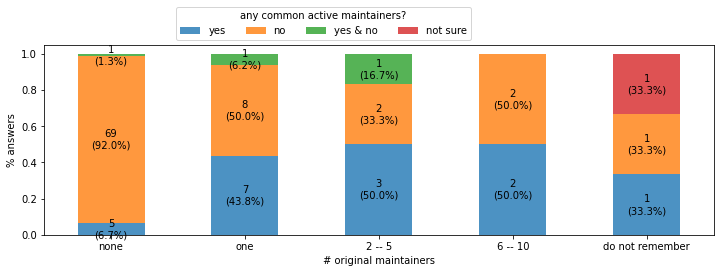

In [167]:
df = pd.read_csv('./common_maintainers.csv', sep=';')
df['value'] = 1
# df['common_active_maintainers'] = (df['common_active_maintainers']
#                                    .replace({'yes & no':'both'})
#                                   )
# df['original_developers'] = (df['original_developers']
#                                    .replace({'do not remember':'unknown'})
#                                   )


df_ = (df
       .groupby(['original_developers','common_active_maintainers'])
       .count()
       .reset_index()
      )

df_ = (df_.merge((
    df_
    .groupby(['original_developers'])
    .agg({
        'value':sum
    })
    .reset_index()
    .rename(columns={'value':'all'})),
 on = ['original_developers']
))
df_['prop'] = df_['value']/df_['all']

df_tmp = (df_[['common_active_maintainers','original_developers','prop']]
       .pivot_table(index=['original_developers'], columns='common_active_maintainers', values='prop')
       .reset_index()
       .set_index('original_developers')

)
df_tmp_2 = (df_[['common_active_maintainers','original_developers','value']]
   .pivot_table(index=['original_developers'], columns='common_active_maintainers', values='value')
   .reset_index()
   .set_index('original_developers')
                    
)
df_tmp = df_tmp [['yes','no','yes & no','not sure']].fillna(0).reindex(["none","one","2 -- 5", "6 -- 10","do not remember"])
df_tmp_2 = df_tmp_2 [['yes','no','yes & no','not sure']].fillna(0).reindex(["none","one","2 -- 5", "6 -- 10","do not remember"])

ax = df_tmp.plot.bar(stacked=True, alpha=0.8)
ax.set(
    xlabel='# original maintainers',
    ylabel = '% answers',
)

def check_num(x,common,severity,df):
    if x==0:
        return ''
    return str(int(df.at[severity,common]))+'\n('+str(round(x*100,1))+'%)'
for i, severity in enumerate(["none","one","2 -- 5", "6 -- 10","do not remember"]):
    no = df_tmp.at[severity,'no'] 
    not_sure = df_tmp.at[severity,'not sure']
    yes = df_tmp.at[severity,'yes']
    both = df_tmp.at[severity,'yes & no']
    ax.annotate('{}'.format(check_num(yes,'yes',severity,df_tmp_2)), (i, (yes/2)), ha='center', va='center')
    ax.annotate('{}'.format(check_num(no,'no',severity,df_tmp_2)), (i, yes+(no/2)), ha='center', va='center')
    ax.annotate('{}'.format(check_num(both,'yes & no',severity,df_tmp_2)), (i, yes+no+(both/2)), ha='center', va='center')
    ax.annotate('{}'.format(check_num(not_sure,'not sure',severity,df_tmp_2)), (i, 1-(not_sure/2)), ha='center', va='center')
ax.figure.set_size_inches(12,3.5)
ax.legend(bbox_to_anchor=(0.19, 1), title='any common active maintainers?', ncol=4)
plt.xticks(rotation = 0)

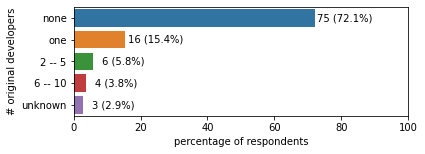

In [20]:
df = pd.read_csv('./individual_plots.csv', sep=';')
df.dropna(inplace=True)
df['value'] = 1

df['original_developers'] = (df['original_developers']
                                   .replace({'do not remember':'unknown'})
                                  )
df_ = (df[['original_developers','value']]
       .groupby(['original_developers'])
       .count()
       .reset_index())

df_['all'] = df_.value.sum()
df_['prop'] = df_['value']*100/df_['all']
df_ = df_.sort_values('value', ascending=False)

ax = sns.barplot(x="prop", 
                 y="original_developers", 
                 data=df_, 
                 linewidth=1)
ax.set_xlabel("percentage of respondents")
ax.set_ylabel('# original developers')
ax.figure.set_size_inches(6,2)
ax.set_xlim(0,100)

position =-1
for i, s in enumerate(df_.original_developers.tolist()):
    prop = df_.query('original_developers == "{}"'.format(s)).prop.values[0]
    value = df_.query('original_developers == "{}"'.format(s)).value.values[0]
    position = position+1.0
    ax.annotate('{} ({}%)'.format(value, round(prop,1)), (prop+9, i ), ha='center', va='center')
    
savefig(ax.figure, 'original_developers')


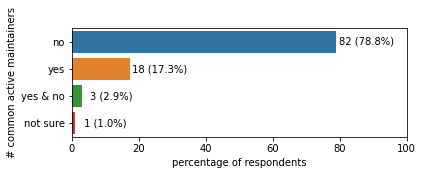

In [169]:
df = pd.read_csv('./individual_plots.csv', sep=';')
df.dropna(inplace=True)
df['value'] = 1

df_ = (df[['common_active_maintainers','value']]
       .groupby(['common_active_maintainers'])
       .count()
       .reset_index())

df_['all'] = df_.value.sum()
df_['prop'] = df_['value']*100/df_['all']
df_ = df_.sort_values('value', ascending=False)

ax = sns.barplot(x="prop", 
                 y="common_active_maintainers", 
                 data=df_, 
                 linewidth=1)
ax.set_xlabel("percentage of respondents")
ax.set_ylabel('# common active maintainers')
ax.figure.set_size_inches(6,2)
ax.set_xlim(0,100)

position =-1
for i, s in enumerate(df_.common_active_maintainers.tolist()):
    prop = df_.query('common_active_maintainers == "{}"'.format(s)).prop.values[0]
    value = df_.query('common_active_maintainers == "{}"'.format(s)).value.values[0]
    position = position+1.0
    ax.annotate('{} ({}%)'.format(value, round(prop,1)), (prop+9, i ), ha='center', va='center')
    
savefig(ax.figure, 'common_maintainers')


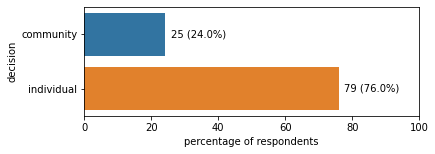

In [170]:
df = pd.read_csv('./individual_plots.csv', sep=';')
df.dropna(inplace=True)
df['value'] = 1

df_ = (df[['decision','value']]
       .groupby(['decision'])
       .count()
       .reset_index())

df_['all'] = df_.value.sum()
df_['prop'] = df_['value']*100/df_['all']
df_ = df_.sort_values('value')
ax = sns.barplot(x="prop", 
                 y="decision", 
                 data=df_, 
                 linewidth=1)
ax.set_xlabel("percentage of respondents")
ax.set_ylabel('decision')
ax.figure.set_size_inches(6,2)
ax.set_xlim(0,100)

position =-1
for i, s in enumerate(df_.decision.tolist()):
    prop = df_.query('decision == "{}"'.format(s)).prop.values[0]
    value = df_.query('decision == "{}"'.format(s)).value.values[0]
    position = position+1.0
    ax.annotate('{} ({}%)'.format(value, round(prop,1)), (prop+10, i ), ha='center', va='center')
    
savefig(ax.figure, 'decision')


In [208]:
def change_xlim(ax, min_x, max_x):
    posx = [x for x in ax.get_xticks()]
    texts = [x.get_text() for x in ax.get_xticklabels()]
    ticks = {x: int(t[:-1]) for x, t in sorted(zip(posx, texts))}
    space = list(ticks.keys())[1] - list(ticks.keys())[0]
    increment = list(ticks.values())[0] - list(ticks.values())[1]
    cur_min = list(ticks.values())[0]
    cur_min_pos = list(ticks.keys())[0]
    cur_max = list(ticks.values())[-1]
    cur_max_pos = list(ticks.keys())[-1]
    ax.set_xlim(
        cur_min_pos + (cur_min - min_x) * space / increment,
        cur_max_pos - (cur_max - max_x) * space / increment + 0.001
    )
    ticks = [x for x in np.arange(ax.get_xlim()[0], ax.get_xlim()[1], increment)]
    labels = [str(abs(-min_x + increment * i)) + '%' for i in range(len(ticks))]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)

104


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



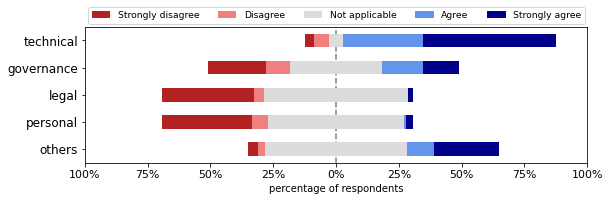

In [257]:
# Make sure you have some data
df = pd.read_csv('./individual_plots.csv', sep=';')
df.dropna(inplace=True)
print(len(df))
df.sample()
data = df[['technical','governance','legal','personal','others']]
scale = [
     "Strongly disagree",
     "Disagree",
     "Not applicable",
     "Agree",
     "Strongly agree",
 ]
# Now plot it!
for c in data.columns:
    data[c] = data[c].replace({'Not Applicable':'Not applicable'})
    data[c] = data[c].replace({'Strongly Agree':'Strongly agree'})
ax = plot_likert.plot_likert(data, scale, plot_percentage=True)
ax.figure.set_size_inches(9,2.5)
ax.legend(bbox_to_anchor=(1.005, 1.18), title='', ncol=5, prop={'size': 9.3})

ax.set_xlabel("percentage of respondents")
change_xlim(ax, 100, 100)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 12)
savefig(ax.figure, 'likert_motivations_1')


105


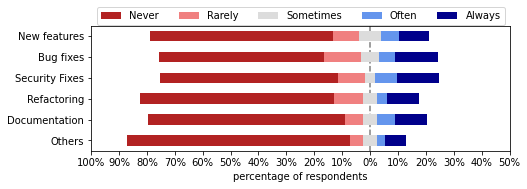

In [246]:
df = pd.read_csv('./to_mainline.csv', sep=';')
df.dropna(inplace=True)
scale = ['Never', 'Rarely','Sometimes','Often','Always']
print(len(df))
data = df.copy()

# Now plot it!

ax = plot_likert.plot_likert(data, scale, plot_percentage=True)
ax.figure.set_size_inches(7.5,2.3)
ax.legend(bbox_to_anchor=(1, 1.19), title='', ncol=5, prop={'size': 10})

ax.set_xlabel("percentage of respondents")
change_xlim(ax, 100, 50)

savefig(ax.figure, 'likert_integration_to_mainline')


105


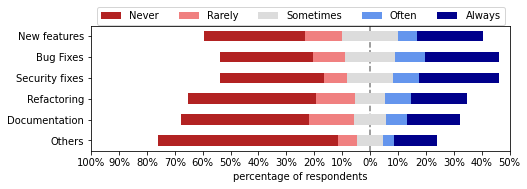

In [234]:
df = pd.read_csv('./from_mainline.csv', sep=';')
df.dropna(inplace=True)
scale = ['Never', 'Rarely','Sometimes','Often','Always']
print(len(df))
data = df.copy()

# Now plot it!

ax = plot_likert.plot_likert(data, scale, plot_percentage=True)
ax.figure.set_size_inches(7.5,2.3)
ax.legend(bbox_to_anchor=(1, 1.19), title='', ncol=5, prop={'size': 10})
ax.set_xlabel("percentage of respondents")
change_xlim(ax, 100, 50)
savefig(ax.figure, 'likert_integration_from_mainline')


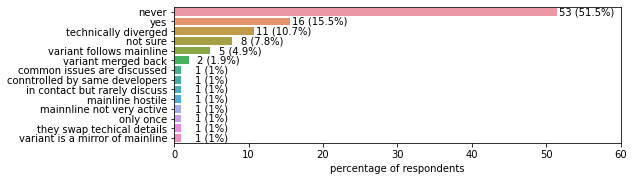

In [197]:
df = pd.read_csv('./discussions_rq3.csv', sep=';')
df.dropna(inplace=True)
df['value'] = 1

df_ = (df
       .groupby(['discussions_rq3'])
       .count()
       .reset_index())

df_['all'] = df_.value.sum()
df_['prop'] = df_['value']*100/df_['all']
df_ = df_.sort_values('value', ascending=False)

ax = sns.barplot(x="prop", 
                 y="discussions_rq3", 
                 data=df_, 
                 #color='gray',
                 linewidth=1)
ax.set_xlabel("% responses")
ax.set_ylabel('')
ax.figure.set_size_inches(8,2.5)
ax.set_xlim(0,60)
def round_2(prop,i):
    if round(prop,1) % 1 ==0:
        return int(round(prop,1))
    return round(prop,1)
for i, s in enumerate(df_.discussions_rq3.tolist()):
    prop = df_.query('discussions_rq3 == "{}"'.format(s)).prop.values[0]
    value = df_.query('discussions_rq3 == "{}"'.format(s)).value.values[0]
    position = position+1.0
    ax.annotate('{} ({}%)'.format(value, round_2(prop,1)), (prop+4, i), ha='center', va='center')
ax.set_xlabel("percentage of respondents")
 
savefig(ax.figure, 'discussions_rq3_colored')


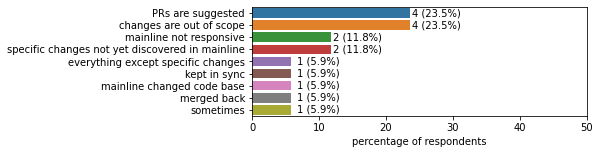

In [196]:
df = pd.read_csv('./changes_to_mainline_RQ3.csv', sep=';')
df.dropna(inplace=True)
df['value'] = 1

df['changes_to_mainline'] = df['changes_to_mainline'].replace({'changes  are out of scope':'changes are out of scope',
                                                              'PR are suggested':'PRs are suggested',
                                                              'PRs suggested':'PRs are suggested'})

df_ = (df
       .groupby(['changes_to_mainline'])
       .count()
       .reset_index())

df_['all'] = df_.value.sum()
df_['prop'] = df_['value']*100/df_['all']
df_ = df_.sort_values('value', ascending=False)

ax = sns.barplot(x="prop", 
                 y="changes_to_mainline", 
                 data=df_, 
                 #color='gray',
                 linewidth=1)
ax.set_xlabel("percentage of respondents")
ax.set_ylabel('')
ax.figure.set_size_inches(6,2)
ax.set_xlim(0,50)
def round_2(prop,i):
    if round(prop,1) % 1 ==0:
        return int(round(prop,1))
    return round(prop,1)
for i, s in enumerate(df_.changes_to_mainline.tolist()):
    prop = df_.query('changes_to_mainline == "{}"'.format(s)).prop.values[0]
    value = df_.query('changes_to_mainline == "{}"'.format(s)).value.values[0]
    position = position+1.0
    ax.annotate('{} ({}%)'.format(value, round_2(prop,1)), (prop+4, i), ha='center', va='center')
    
savefig(ax.figure, 'changes_to_mainline')


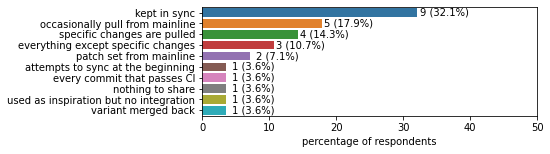

In [195]:
df = pd.read_csv('./changes_from_mainline_RQ3.csv', sep=';')
df.dropna(inplace=True)
df['value'] = 1

df_ = (df
       .groupby(['changes_from_mainline'])
       .count()
       .reset_index())

df_['all'] = df_.value.sum()
df_['prop'] = df_['value']*100/df_['all']
df_ = df_.sort_values('value', ascending=False)

ax = sns.barplot(x="prop", 
                 y="changes_from_mainline", 
                 data=df_, 
                 #color='gray',
                 linewidth=1)
ax.set_xlabel("percentage of respondents")
ax.set_ylabel('')
ax.figure.set_size_inches(6,2)
ax.set_xlim(0,50)
def round_2(prop,i):
    if round(prop,1) % 1 ==0:
        return int(round(prop,1))
    return round(prop,1)
for i, s in enumerate(df_.changes_from_mainline.tolist()):
    prop = df_.query('changes_from_mainline == "{}"'.format(s)).prop.values[0]
    value = df_.query('changes_from_mainline == "{}"'.format(s)).value.values[0]
    position = position+1.0
    ax.annotate('{} ({}%)'.format(value, round_2(prop,1)), (prop+4, i), ha='center', va='center')
    
savefig(ax.figure, 'changes_from_mainline')
